# Capstone project - Finding a better place in Brooklyn, New York

### 1) Installing and Importing Python Libraries and Dependencies

In [1]:
!pip install geocoder
!pip install folium

In [2]:
import pandas as pd
import requests
import numpy as np

import geocoder
import folium

import requests 

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

import json
import xml

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


### 2) Data Extraction and Cleaning

link: https://geo.nyu.edu/catalog/nyu_2451_34572

In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
neighborhoods_data = newyork_data['features']

In [7]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

**Creating a new table and filling it with data**

In [8]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)

In [9]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


**Finding co-ordinates of New York and marking all the neighbourhoods in it**

In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


**Map of Brooklyn**

In [16]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [17]:
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

**Foursqaure API credentials**

In [18]:
CLIENT_ID = '5CDUHHKLJ4PTYEAO5RDBLE2GIDAEKBWASUZ4GJO0F11SUN5L' # your Foursquare ID
CLIENT_SECRET = 'BMNDW35VQZRE3DXZXJBK3TRLSJCEGA2IEVGEBU5GSH23OJ2M' # your Foursquare Secret
VERSION = '20201010' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5CDUHHKLJ4PTYEAO5RDBLE2GIDAEKBWASUZ4GJO0F11SUN5L
CLIENT_SECRET:BMNDW35VQZRE3DXZXJBK3TRLSJCEGA2IEVGEBU5GSH23OJ2M


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [21]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(270, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Georgian Dream Cafe and Bakery,40.625586,-74.030196,Caucasian Restaurant
1,Bay Ridge,40.625801,-74.030621,RED OAK Restaurant & Bar & Hookah Lounge,40.625447,-74.030246,Hookah Bar
2,Bay Ridge,40.625801,-74.030621,Blue Zoo Lounge,40.625030,-74.030554,Lounge
3,Bay Ridge,40.625801,-74.030621,XIN,40.625082,-74.030494,Chinese Restaurant
4,Bay Ridge,40.625801,-74.030621,Caffe Cafe,40.624945,-74.030342,Café


In [22]:
print('There are {} Uniques Categories.'.format(len(brooklyn_venues['Venue Category'].unique())))
brooklyn_venues.groupby('Neighborhood').count().head()

There are 129 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bay Ridge,11,11,11,11,11,11
Bedford Stuyvesant,3,3,3,3,3,3
Bensonhurst,1,1,1,1,1,1
Boerum Hill,1,1,1,1,1,1
Brighton Beach,11,11,11,11,11,11


**One hot encoding**

In [23]:
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head(5)

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Boxing Gym,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Creperie,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner,Dumpling Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Music Venue,New American Restaurant,Optical Shop,Other Great Outdoors,Pakistani Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Pier,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Polish Restaurant,Pool Hall,Pub,Racetrack,Residential Building (Apartment / Condo),Restaurant,Roller Rink,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Shanghai Restaurant,Shoe Store,Shopping Mall,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Boxing Gym,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Creperie,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner,Dumpling Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Music Venue,New American Restaurant,Optical Shop,Other Great Outdoors,Pakistani Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Pier,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Polish Restaurant,Pool Hall,Pub,Racetrack,Residential Building (Apartment / Condo),Restaurant,Roller Rink,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Shanghai Restaurant,Shoe Store,Shopping Mall,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Bay Ridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.090909,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.090909,0.000000,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.090909,0.000000,0.000000,0.090909,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.090909,0.000000,0.0,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.090909
1,Bedford Stuyvesant,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.

In [25]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bay Ridge----
                  venue  freq
0           Yoga Studio  0.09
1       Thai Restaurant  0.09
2           Pizza Place  0.09
3                   Spa  0.09
4  Caucasian Restaurant  0.09


----Bedford Stuyvesant----
                  venue  freq
0           Bus Station  0.33
1  Gym / Fitness Center  0.33
2         Grocery Store  0.33
3                  Park  0.00
4           Music Venue  0.00


----Bensonhurst----
               venue  freq
0               Park   1.0
1  Accessories Store   0.0
2          Hotel Bar   0.0
3        Pizza Place   0.0
4     Pilates Studio   0.0


----Boerum Hill----
                     venue  freq
0                   Bakery   1.0
1        Accessories Store   0.0
2              Music Venue   0.0
3  New American Restaurant   0.0
4             Optical Shop   0.0


----Brighton Beach----
               venue  freq
0              Diner  0.09
1        Coffee Shop  0.09
2       Dessert Shop  0.09
3          Bookstore  0.09
4  Food & Drink Shop  0.09




**Finding top ten venues around each neighbourhood**

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Yoga Studio,Thai Restaurant,Café,Spa,Lounge,Caucasian Restaurant,Sushi Restaurant,Chinese Restaurant,Pool Hall,Pizza Place
1,Bedford Stuyvesant,Gym / Fitness Center,Grocery Store,Bus Station,Yoga Studio,Dry Cleaner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Discount Store
2,Bensonhurst,Park,Yoga Studio,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
3,Boerum Hill,Bakery,Yoga Studio,Food Truck,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
4,Brighton Beach,Coffee Shop,Diner,Liquor Store,Restaurant,Sushi Restaurant,Food & Drink Shop,Optical Shop,Bookstore,Dessert Shop,Varenyky restaurant


**Kmeans clustering**

In [38]:
kclusters = 3

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [39]:
neighborhoods_venues_sorted.insert(0, 'Clustering Label', kmeans.labels_)

brooklyn_merged = brooklyn_data

brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Clustering Label,Clustering Labels1,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0.0,0.0,Yoga Studio,Thai Restaurant,Café,Spa,Lounge,Caucasian Restaurant,Sushi Restaurant,Chinese Restaurant,Pool Hall,Pizza Place
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1.0,1.0,Park,Yoga Studio,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
2,Brooklyn,Sunset Park,40.645103,-74.010316,0.0,0.0,Pizza Place,Bagel Shop,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Latin American Restaurant,Bank,Mexican Restaurant,Gastropub,Gay Bar
3,Brooklyn,Greenpoint,40.730201,-73.954241,0.0,0.0,Butcher,Grocery Store,Vegetarian / Vegan Restaurant,Polish Restaurant,Arts & Crafts Store,Italian Restaurant,Fruit & Vegetable Store,Gastropub,Market,Bar
4,Brooklyn,Gravesend,40.595260,-73.973471,0.0,0.0,Lounge,Yoga Studio,Food Truck,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner


In [40]:
del brooklyn_merged["Clustering Labels1"]
brooklyn_merged

,Borough,Neighborhood,Latitude,Longitude,Clustering Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0.0,Yoga Studio,Thai Restaurant,Café,Spa,Lounge,Caucasian Restaurant,Sushi Restaurant,Chinese Restaurant,Pool Hall,Pizza Place
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1.0,Park,Yoga Studio,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
2,Brooklyn,Sunset Park,40.645103,-74.010316,0.0,Pizza Place,Bagel Shop,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Latin American Restaurant,Bank,Mexican Restaurant,Gastropub,Gay Bar
3,Brooklyn,Greenpoint,40.730201,-73.954241,0.0,Butcher,Grocery Store,Vegetarian / Vegan Restaurant,Polish Restaurant,Arts & Crafts Store,Italian Restaurant,Fruit & Vegetable Store,Gastropub,Market,Bar
4,Brooklyn,Gravesend,40.595260,-73.973471,0.0,Lounge,Yoga Studio,Food Truck,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
5,Brooklyn,Brighton Beach,40.576825,-73.965094,0.0,Coffee Shop,Diner,Liquor Store,Restaurant,Sushi Restaurant,Food & Drink Shop,Optical Shop,Bookstore,Dessert Shop,Varenyky restaurant
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Brooklyn,Flatbush,40.636326,-73.958401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Brooklyn,Crown Heights,40.670829,-73.943291,0.0,Spa,Deli / Bodega,Pharmacy,Fried Chicken Joint,Dry Cleaner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Discount Store


In [41]:
brooklyn_merged= brooklyn_merged.dropna()
brooklyn_merged

,Borough,Neighborhood,Latitude,Longitude,Clustering Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0.0,Yoga Studio,Thai Restaurant,Café,Spa,Lounge,Caucasian Restaurant,Sushi Restaurant,Chinese Restaurant,Pool Hall,Pizza Place
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1.0,Park,Yoga Studio,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
2,Brooklyn,Sunset Park,40.645103,-74.010316,0.0,Pizza Place,Bagel Shop,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Latin American Restaurant,Bank,Mexican Restaurant,Gastropub,Gay Bar
3,Brooklyn,Greenpoint,40.730201,-73.954241,0.0,Butcher,Grocery Store,Vegetarian / Vegan Restaurant,Polish Restaurant,Arts & Crafts Store,Italian Restaurant,Fruit & Vegetable Store,Gastropub,Market,Bar
4,Brooklyn,Gravesend,40.595260,-73.973471,0.0,Lounge,Yoga Studio,Food Truck,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
5,Brooklyn,Brighton Beach,40.576825,-73.965094,0.0,Coffee Shop,Diner,Liquor Store,Restaurant,Sushi Restaurant,Food & Drink Shop,Optical Shop,Bookstore,Dessert Shop,Varenyky restaurant
9,Brooklyn,Crown Heights,40.670829,-73.943291,0.0,Spa,Deli / Bodega,Pharmacy,Fried Chicken Joint,Dry Cleaner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Discount Store
10,Brooklyn,East Flatbush,40.641718,-73.936103,0.0,Liquor Store,Pharmacy,Moving Target,Supermarket,Food & Drink Shop,Yoga Studio,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Dog Run
11,Brooklyn,Kensington,40.642382,-73.980421,0.0,Mexican Restaurant,Liquor Store,Grocery Store,Sandwich Place,Racetrack,Bakery,Yoga Studio,Farmers Market,Falafel Restaurant,Dumpling Restaurant
12,Brooklyn,Windsor Terrace,40.656946,-73.980073,2.0,Sports Bar,Yoga Studio,Dry Cleaner,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Dog Run,Food Truck


In [48]:
brooklyn_merged["Clustering Label"] =brooklyn_merged["Clustering Label"].astype(int)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


**Plotting the clusters**

In [49]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'],brooklyn_merged['Neighborhood'], brooklyn_merged['Clustering Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [50]:
brooklyn_merged.loc[brooklyn_merged['Clustering Label'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Yoga Studio,Thai Restaurant,Café,Spa,Lounge,Caucasian Restaurant,Sushi Restaurant,Chinese Restaurant,Pool Hall,Pizza Place
2,Sunset Park,Pizza Place,Bagel Shop,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Latin American Restaurant,Bank,Mexican Restaurant,Gastropub,Gay Bar
3,Greenpoint,Butcher,Grocery Store,Vegetarian / Vegan Restaurant,Polish Restaurant,Arts & Crafts Store,Italian Restaurant,Fruit & Vegetable Store,Gastropub,Market,Bar
4,Gravesend,Lounge,Yoga Studio,Food Truck,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
5,Brighton Beach,Coffee Shop,Diner,Liquor Store,Restaurant,Sushi Restaurant,Food & Drink Shop,Optical Shop,Bookstore,Dessert Shop,Varenyky restaurant
9,Crown Heights,Spa,Deli / Bodega,Pharmacy,Fried Chicken Joint,Dry Cleaner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Discount Store
10,East Flatbush,Liquor Store,Pharmacy,Moving Target,Supermarket,Food & Drink Shop,Yoga Studio,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Dog Run
11,Kensington,Mexican Restaurant,Liquor Store,Grocery Store,Sandwich Place,Racetrack,Bakery,Yoga Studio,Farmers Market,Falafel Restaurant,Dumpling Restaurant
13,Prospect Heights,Playground,Mexican Restaurant,Bar,Garden,Food Court,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Dry Cleaner
14,Brownsville,Coffee Shop,Burger Joint,Yoga Studio,Food Court,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run


In [51]:
brooklyn_merged.loc[brooklyn_merged['Clustering Label'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Park,Yoga Studio,Creperie,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Dry Cleaner
67,Highland Park,Gym / Fitness Center,Park,Yoga Studio,Food Court,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run


In [52]:
brooklyn_merged.loc[brooklyn_merged['Clustering Label'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Windsor Terrace,Sports Bar,Yoga Studio,Dry Cleaner,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Dumpling Restaurant,Dog Run,Food Truck


In [59]:
brooklyn_data["Neighborhood"]=brooklyn_data["Neighborhood"].unique()

**Finding average rent**

In [62]:
brooklyn_data

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
5,Brooklyn,Brighton Beach,40.576825,-73.965094
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438
8,Brooklyn,Flatbush,40.636326,-73.958401
9,Brooklyn,Crown Heights,40.670829,-73.943291


In [69]:

brooklyn_avg_rent=pd.DataFrame({"Neighborhood":brooklyn_data["Neighborhood"],
                                      "Average_Rent":[1963.0,1869.0,1913.0,4056.0,1859.0,
                                                               2226.0,2156.0,2342.0,2027.0,2423.0,2216.0,
                                                               1868.0,2565.0,3468.0,2513.0,3514.0,3140.0,
                                                               3042.0,3657.0,3657.0,3839.0,3839.0,
                                                               2318.0,3601.0,3559.0,3559.0,2260.0,2292.0,
                                                               2042.0,1789.0,1933.,2226.0,1870.0,1869.0,1877.0,1660.0,1695.0,1697.0,2951.0,
                                                               3111.0,3653.0,2200.0,3205.0,3350.0,1789.0,
                                                               1866.0,2013.0,1789.0,2540.0,2835.0,2335.0,2967.0,1973.0,2854.0,2590.0,2194.0,
                                                               2739.0,1765.0,1789.0,3210.0,3657.0,2318.0,
                                                               2951.0,3657.0,1786.,2917.0,1695.0,2198.0,1999,1874
                                                              
                                                              
                                                              ]})

In [70]:
brooklyn_avg_rent

,Neighborhood,Average_Rent
0,Bay Ridge,1963.0
1,Bensonhurst,1869.0
2,Sunset Park,1913.0
3,Greenpoint,4056.0
4,Gravesend,1859.0
5,Brighton Beach,2226.0
6,Sheepshead Bay,2156.0
7,Manhattan Terrace,2342.0
8,Flatbush,2027.0
9,Crown Heights,2423.0


In [71]:
brooklyn_avg_rent.set_index('Neighborhood',inplace=True,drop=True)

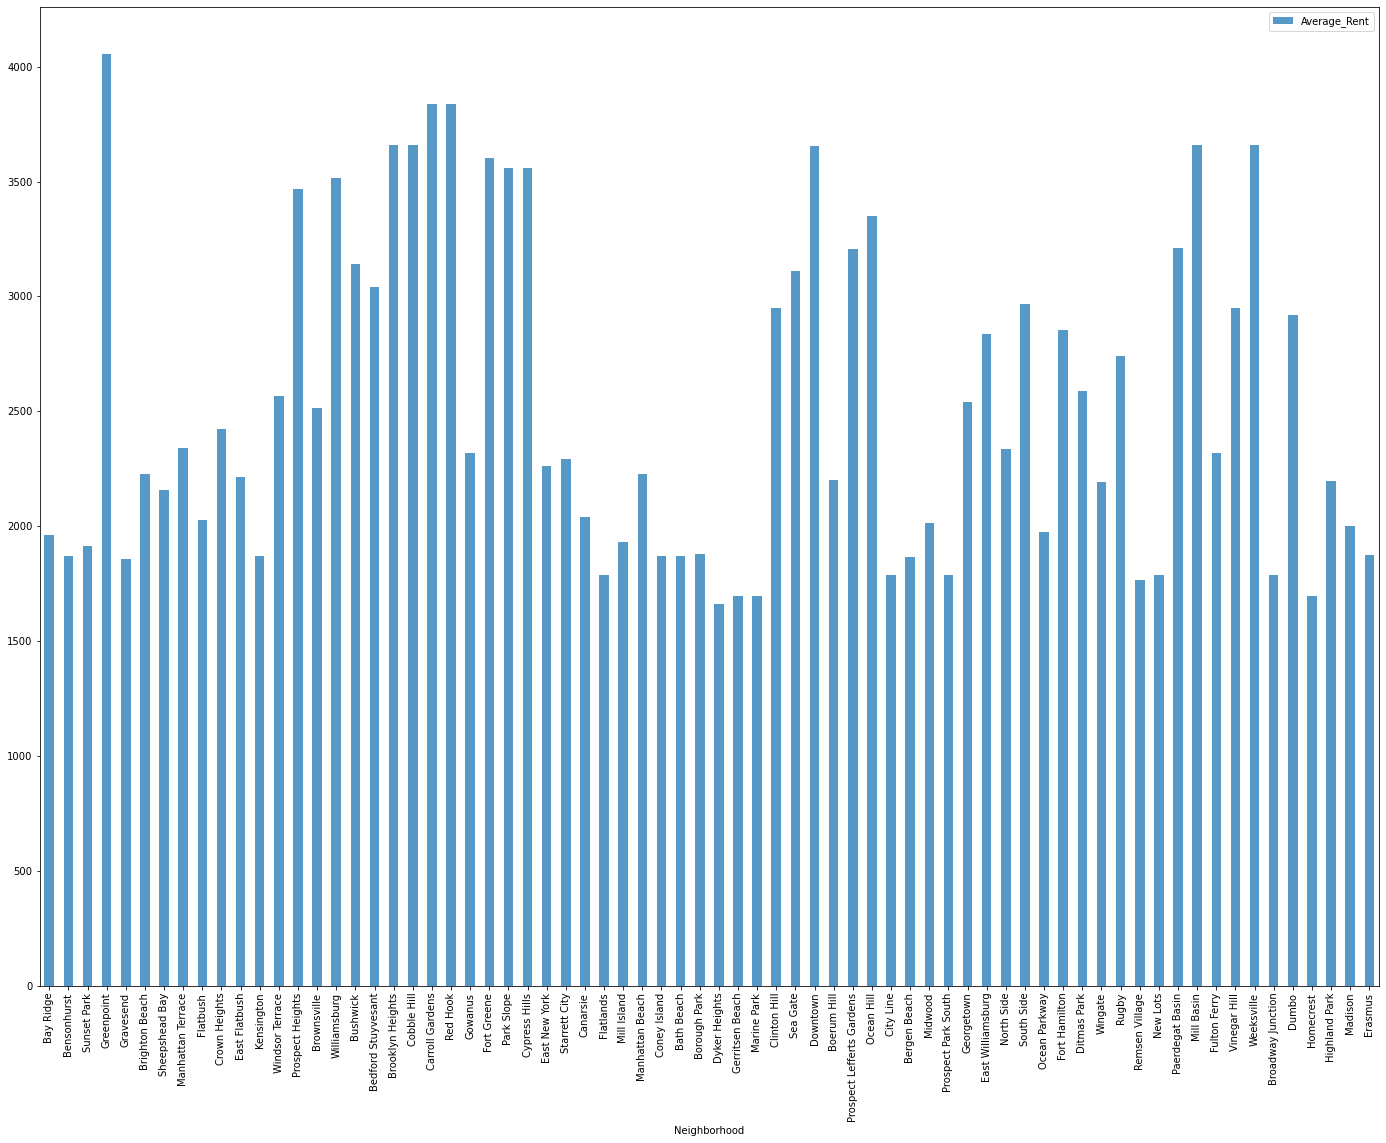

In [72]:
brooklyn_avg_rent.plot(kind='bar',figsize=(24,18),alpha=0.75)

**Conclusion:**

In this project, using k-means cluster algorithm I separated the neighborhood into 3 different clusters and for 129 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average rent have been made